In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
X, y_true = make_blobs(n_samples=200, centers=10, n_features=1, random_state=50)

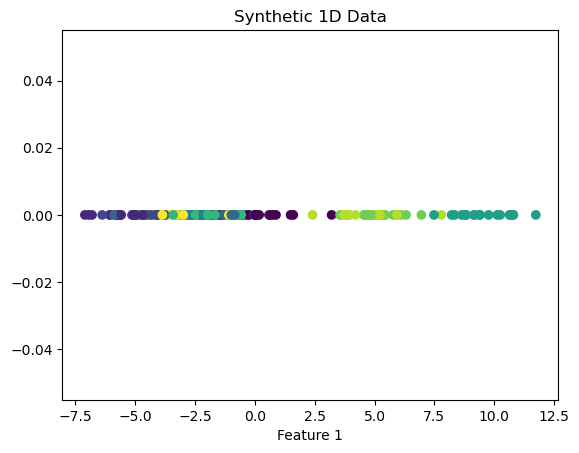

In [3]:
# Plot the data
plt.scatter(X, np.zeros_like(X), c=y_true, cmap='viridis')
plt.title('Synthetic 1D Data')
plt.xlabel('Feature 1')
plt.show()

## KMeans 

In [4]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)

y_kmeans = kmeans.fit_predict(X)

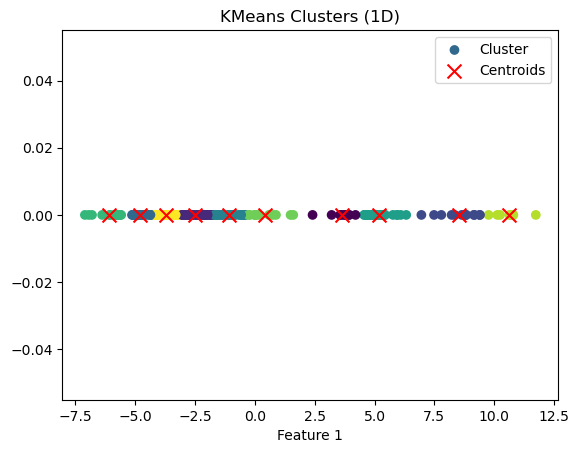

In [5]:
plt.scatter(X, np.zeros_like(X), c=y_kmeans, cmap='viridis', label='Cluster')
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), c='red', marker='x', s=100, label='Centroids')
plt.title('KMeans Clusters (1D)')
plt.xlabel('Feature 1')
plt.legend()
plt.show()

## Evaluation Metrics

In [6]:
# WCSS (Within-Cluster Sum of Squares)
wcss = kmeans.inertia_
print(f'WCSS: {wcss:.2f}')

# ARI (Adjusted Rand Index)
ari = adjusted_rand_score(y_true, y_kmeans)
print(f'ARI: {ari:.2f}')

WCSS: 39.63
ARI: 0.33


## Elbow method

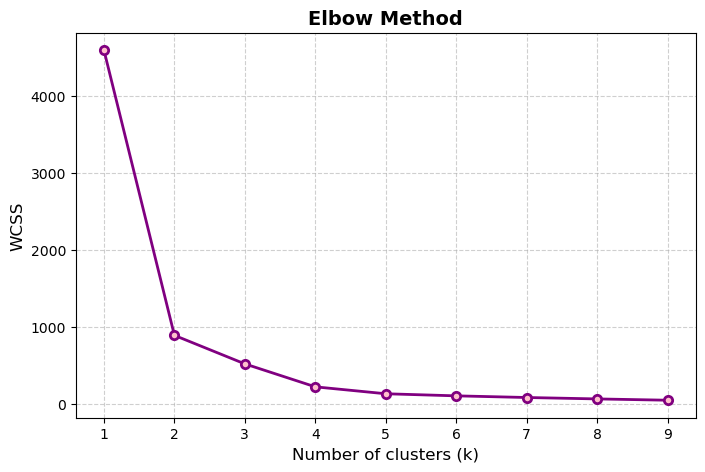

In [7]:
wcss_list = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss_list, marker='o', color='purple', linestyle='-', linewidth=2, markerfacecolor='pink', markeredgewidth=2)
plt.title('Elbow Method', fontsize=14, fontweight='bold')
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
